In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
import joblib
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Importing the dataset
df=pd.read_excel("Data_train.xlsx") #reading Data_Train.xlsx file
df 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
#Checking shape of dataset
df.shape

(10683, 11)

There are 10683 rows and 11 columns in dataset.

In [4]:
#Checking the data types of all columns
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
#Checking null values in dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

The dataset contain Null values in Route and Total_stops.

In [6]:
#Replacing null values with mode becuase the type of objects are object
df['Route'].fillna(df['Route'].mode()[0], inplace=True)
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)

In [7]:
#Checking null values in dataset after replacing the null value
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now, dataset should not contain any null values.

In [8]:
# Reading dataset after replace the null value.
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [9]:
#Checking unique values of each columns
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [10]:
# Check the value count and drop unnecessary coloums

In [11]:
#lets check entries in Source column
df["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [12]:
#lets check entries in Destination column
df["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [13]:
#lets check entries in Total_Stops column
df["Total_Stops"].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [15]:
#Replacing String to numeric for better prediction
df.replace({"non-stop": 0, 
                      "1 stop": 1, 
                      "2 stops": 2, 
                      "3 stops": 3, 
                      "4 stops": 4
                     }, inplace = True)

In [16]:
#lets check entries in Additional_Info column
df["Additional_Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [17]:
#Replacing No Info to No info.
df["Additional_Info"]=df["Additional_Info"].replace("No Info","No info")

In [18]:
#lets check entries in Price column
df["Price"].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [19]:
#lets check entries in Date_of_Journey column
df["Date_of_Journey"].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [20]:
#lets check entries in Airline column
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [21]:
#lets check entries in Route column
df["Route"].value_counts()

DEL → BOM → COK          2377
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [22]:
#lets check entries in Duration column
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [23]:
#Converting Duration from string to numbers
df['hour'] = df['Duration'].str.split("h").str[0]
df['nothing'] = df['Duration'].str.split(" ").str[1]
df['minute'] = df['nothing'].str.split("m").str[0]
df.drop('nothing',axis=1,inplace=True)

In [24]:
#lets check entries in Dep_Time column
df["Dep_Time"].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [25]:
#Converting Departure time into minutes
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'],format = '%H:%M').dt.hour*60 + pd.to_datetime(df['Dep_Time'],format = '%H:%M').dt.minute

In [26]:
#lets check entries in Arrival_Time column
df["Arrival_Time"].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [27]:
df.drop('Route',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)

We have Total_Stops columns, So we don't need Route column.
We have Dep_Time and Duration that is equailent to Arrival time, So we don't need it.

In [28]:
# Reading dataset after replace and drop the columns.
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,hour,minute
0,IndiGo,24/03/2019,Banglore,New Delhi,1340,2h 50m,0,No info,3897,2,50
1,Air India,1/05/2019,Kolkata,Banglore,350,7h 25m,2,No info,7662,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,565,19h,2,No info,13882,19,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,1085,5h 25m,1,No info,6218,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,1010,4h 45m,1,No info,13302,4,45
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,1195,2h 30m,0,No info,4107,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,1245,2h 35m,0,No info,4145,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,500,3h,0,No info,7229,3,NaN
10681,Vistara,01/03/2019,Banglore,New Delhi,690,2h 40m,0,No info,12648,2,40


In [29]:
#Checking shape of dataset
df.shape

(10683, 11)

In [30]:
#Checking unique values of each columns
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Dep_Time            222
Duration            368
Total_Stops           5
Additional_Info       9
Price              1870
hour                 44
minute               11
dtype: int64

There are number of unique values in each column.

# Data Visualization

# Univariate Analysis

Using countplot:

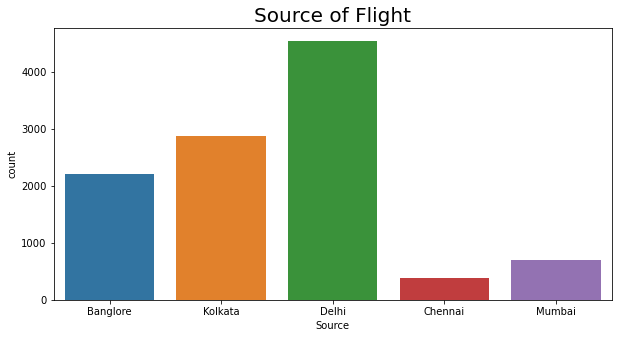

In [32]:
plt.figure(figsize = (10,5))
sns.countplot(x="Source", data=df)
plt.title("Source of Flight", fontsize = 20)
plt.show()

As per the above image we clearly see that Maximum number of Filght Source was Delhi or we can say 4537 Flights source was from Delhi.

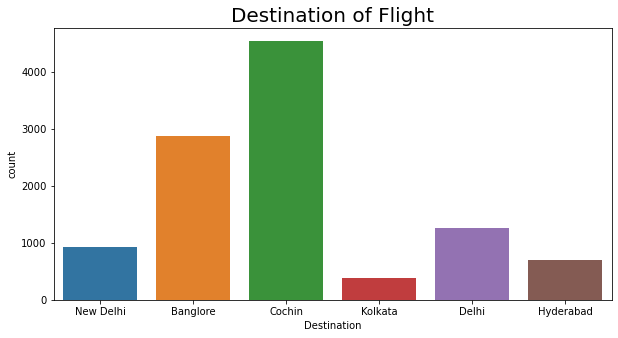

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(x="Destination", data=df)
plt.title("Destination of Flight", fontsize = 20)
plt.show()

As per the above image we clearly see that Flight Destination of Cochin was maximum(4537).

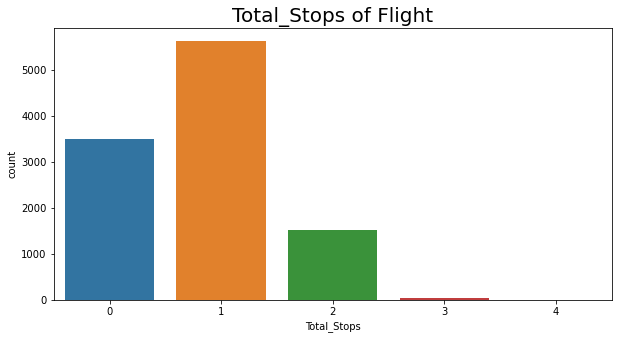

In [34]:
plt.figure(figsize = (10,5))
sns.countplot(x="Total_Stops", data=df)
plt.title("Total_Stops of Flight", fontsize = 20)
plt.show()

As per the image we clearly said that most of the flights were having 1 stop.

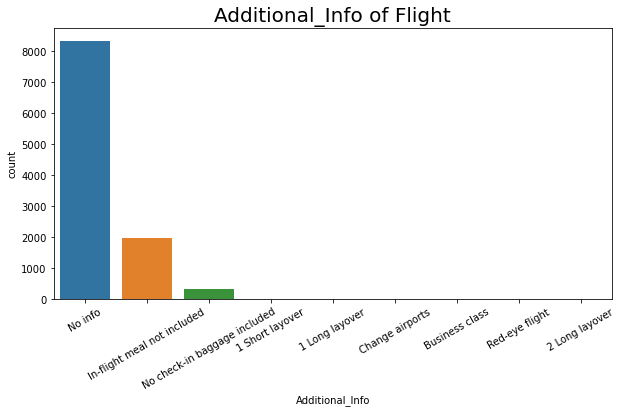

In [36]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="Additional_Info", data=df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Additional_Info of Flight", fontsize = 20) #Setting up the title
plt.show()

As per the above graph we not received enough information.

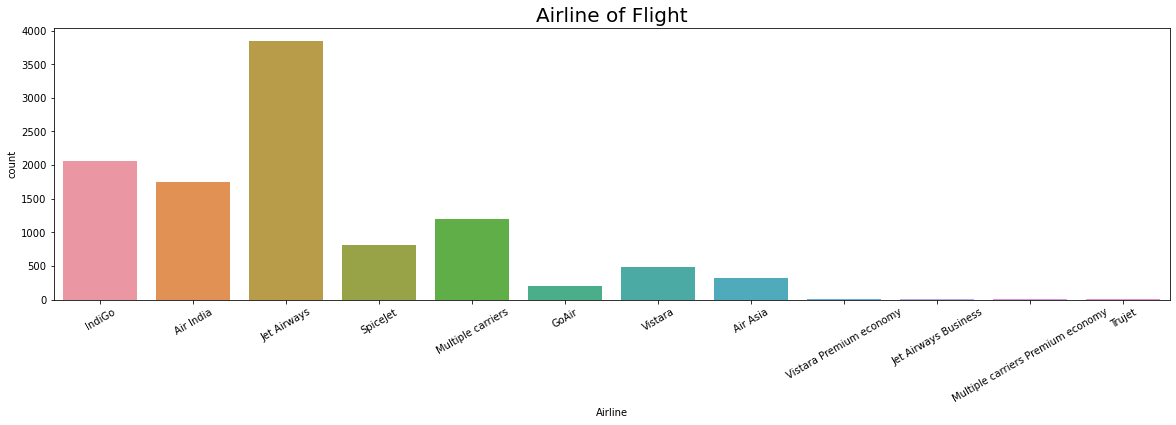

In [37]:
plt.figure(figsize = (20,5)) 
ax=sns.countplot(x="Airline", data=df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Airline of Flight", fontsize = 20)
plt.show() 

As per the above graph we see Jet Airways Airlines Filghts count is more as compared to other.

Using Lineplot:

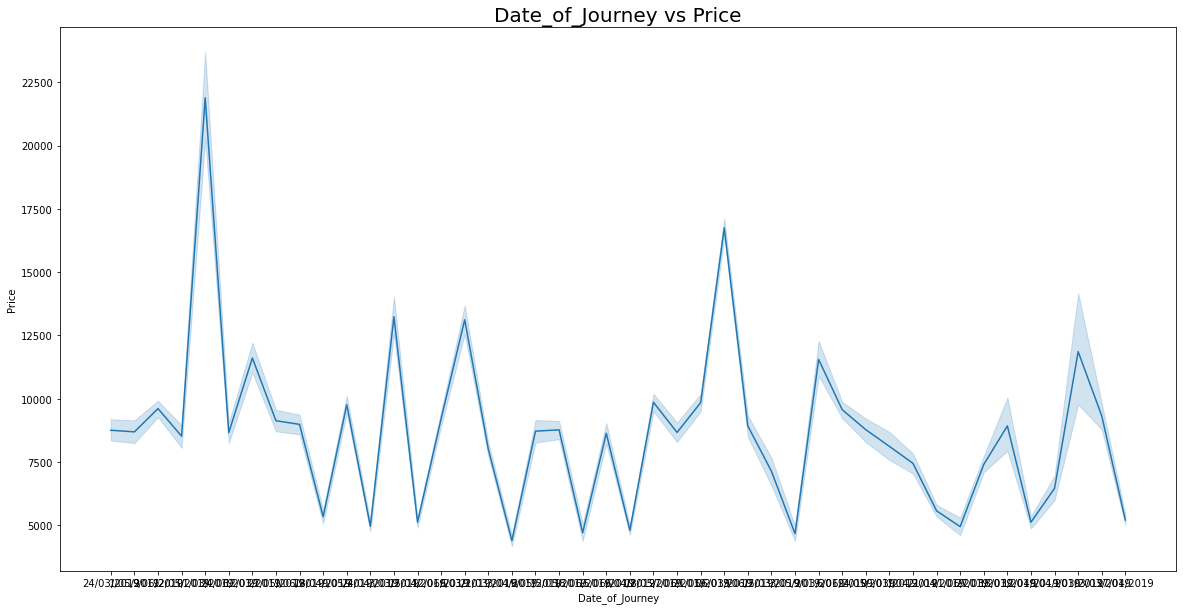

In [42]:
plt.figure(figsize = (20,10))
ax = sns.lineplot(x="Date_of_Journey",y="Price",  data=df)
plt.title("Date_of_Journey vs Price", fontsize = 20)
plt.show()

Using boxplot:

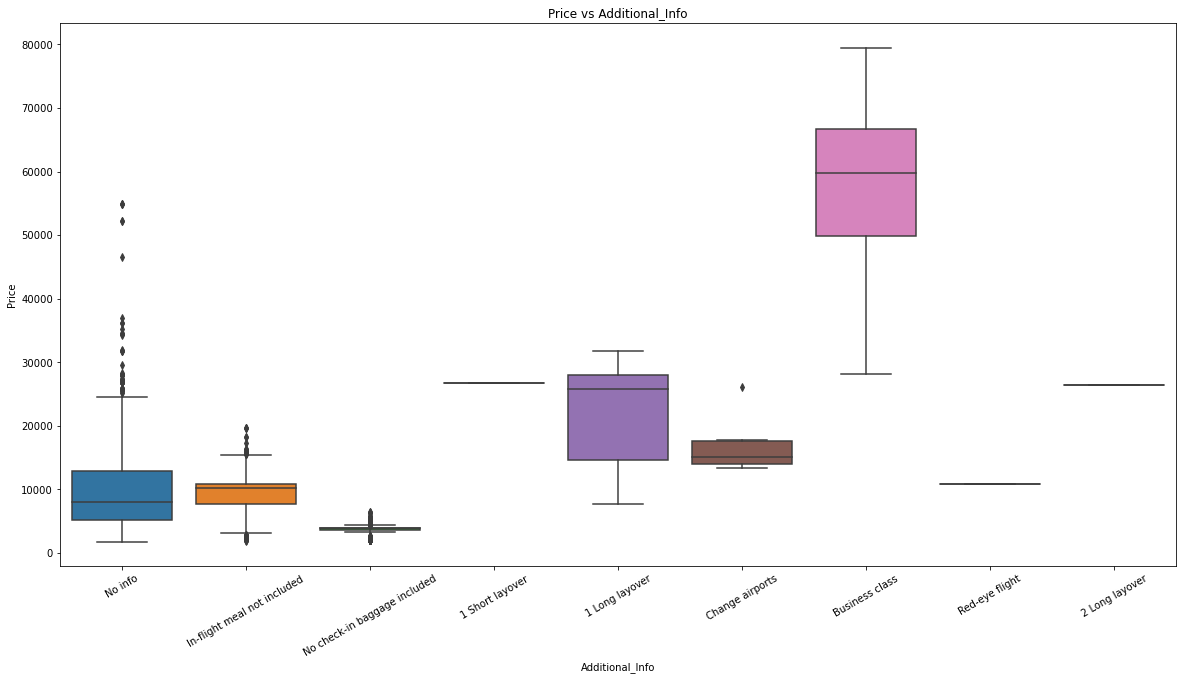

In [44]:
plt.figure(figsize = (20,10))
ax=sns.boxplot(df['Additional_Info'], df['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Price vs Additional_Info')
plt.show()

As per the above graph we conclude:- 
1.The Flight price is too low when No check-in baggage were allowed.
2.When customer choose Business Class that time Price goes too high.
3.When No meal provided in Flight that time flight prices are always lesser than 20,000.

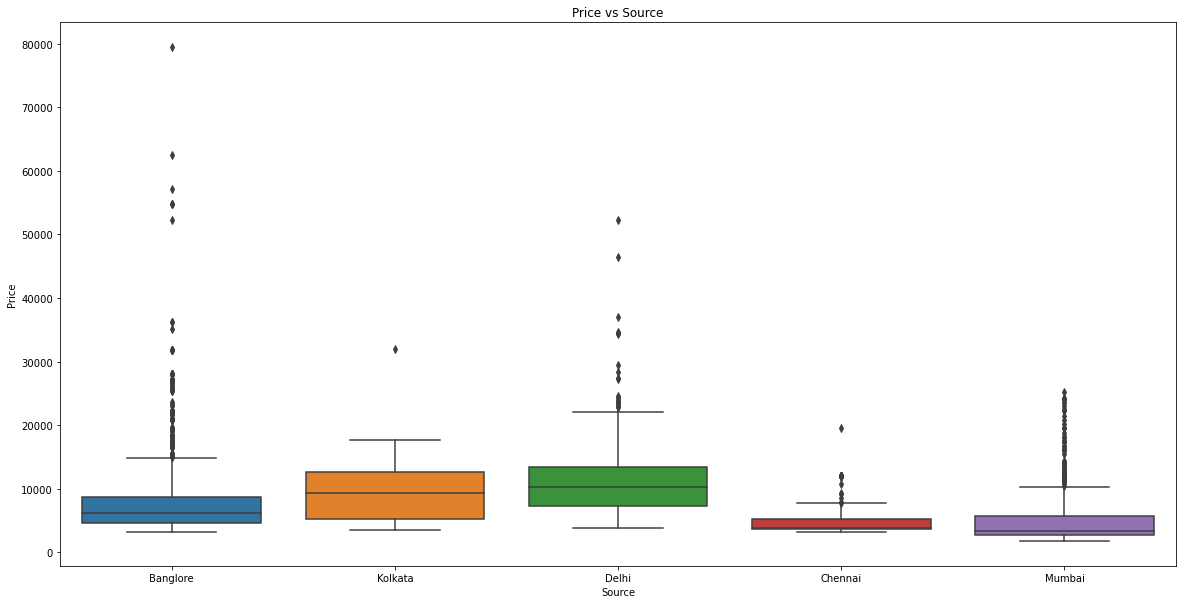

In [45]:
plt.figure(figsize = (20,10))
sns.boxplot(df['Source'], df['Price'])
plt.title('Price vs Source')
plt.show()

As per the above graph we conclude From Chennai and Mumbai the flights are cheaper as compared with other.

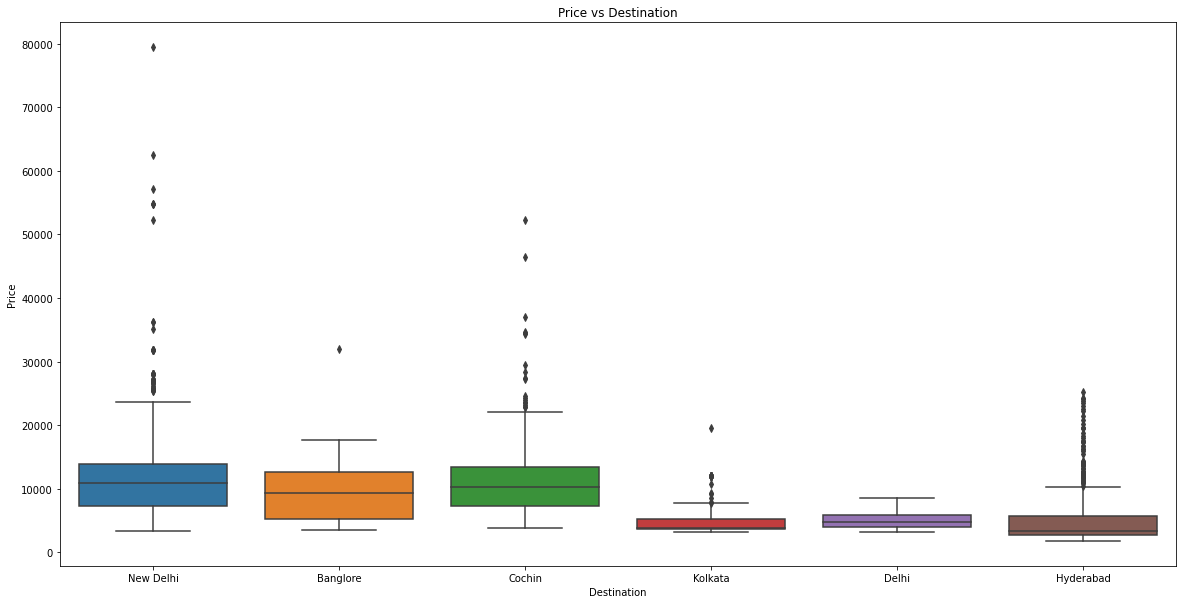

In [46]:
plt.figure(figsize = (20,10))
sns.boxplot(df['Destination'], df['Price'])
plt.title('Price vs Destination')
plt.show()

As per the above graph we conclude that Kolkata, Delhi and Hyderabad flights are cheaper than other Destination price.

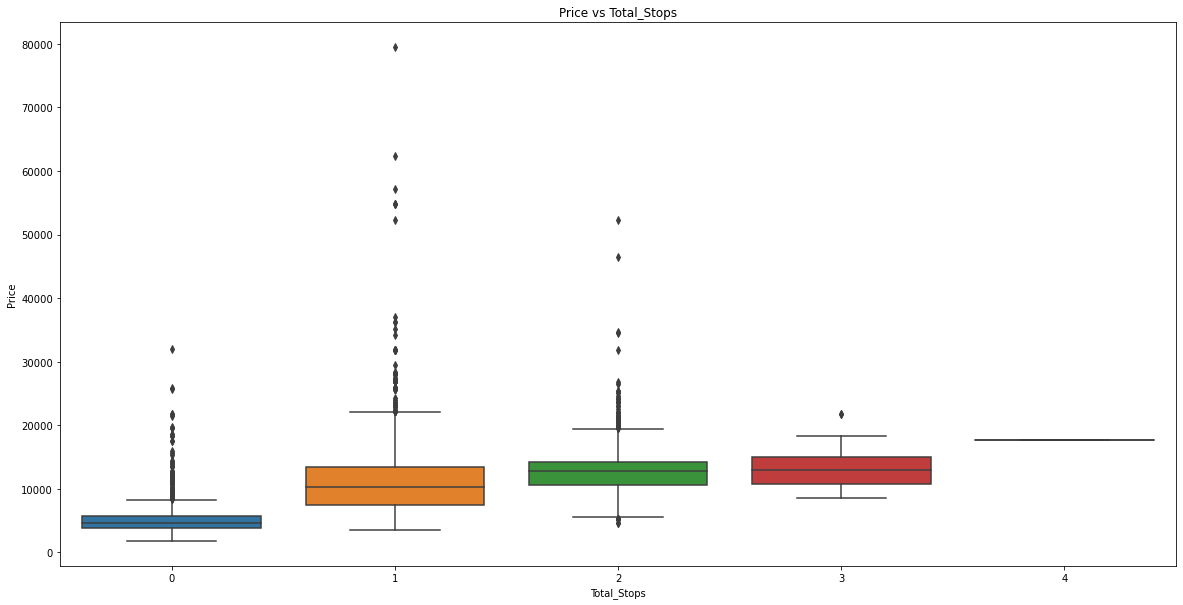

In [47]:
plt.figure(figsize = (20,10))
sns.boxplot(df['Total_Stops'], df['Price'])
plt.title('Price vs Total_Stops')
plt.show()

As per the above graph we conclude that 0 stops flights price is less as compare to multiple stops flights.

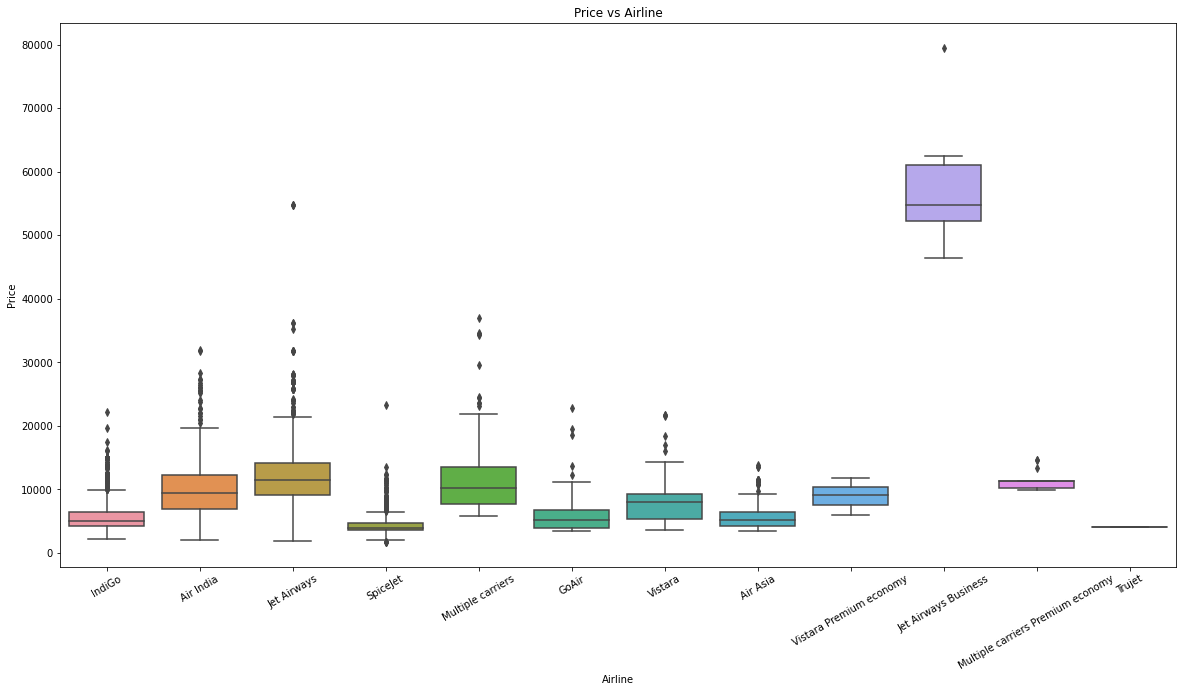

In [48]:
plt.figure(figsize = (20,10))
ax=sns.boxplot(df['Airline'], df['Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Price vs Airline')
plt.show()

As per the above graph we conclude that Jet Airways flights are expencive and Spicejet flights are cheaper.

#  Label Encoding

In [49]:
#Label encoding for the object columns
from sklearn.preprocessing import LabelEncoder
label_list=list(df.select_dtypes(['object']).columns)
le=LabelEncoder()  
for i in label_list:
    df[i] = le.fit_transform(df[i])

In [51]:
df.skew()

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Dep_Time           0.125184
Duration          -0.213427
Total_Stops        0.317049
Additional_Info   -2.114551
Price              1.812552
hour               0.789257
minute             0.082860
dtype: float64

# Multivariate Analysis

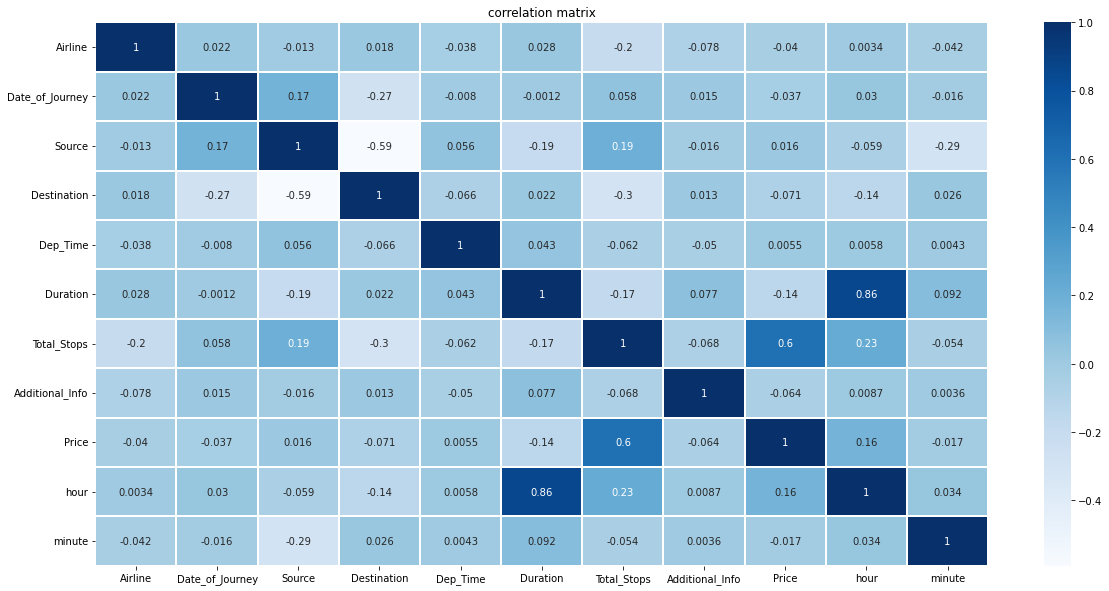

In [52]:
# Using Heatmap
fig=plt.figure(figsize=(20,10))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

As per the above graph we conclude that Price is highly corelated with Duration and Total_Stops

In [53]:
#Checking a data description
df.describe()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,hour,minute
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,773.852382,194.069269,0.824207,6.582140,9087.064121,16.781335,5.622297
std,2.352155,12.337763,1.177221,1.474782,344.964055,108.620556,0.675199,0.838073,4611.359167,13.891572,3.384339
min,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000
25%,3.000000,14.000000,2.000000,0.000000,480.000000,106.000000,0.000000,7.000000,5277.000000,6.000000,3.000000
50%,4.000000,24.000000,2.000000,1.000000,710.000000,233.000000,1.000000,7.000000,8372.000000,11.000000,5.000000
75%,4.000000,35.000000,3.000000,2.000000,1085.000000,280.000000,1.000000,7.000000,12373.000000,22.000000,9.000000
max,11.000000,43.000000,4.000000,5.000000,1435.000000,367.000000,4.000000,8.000000,79512.000000,43.000000,11.000000


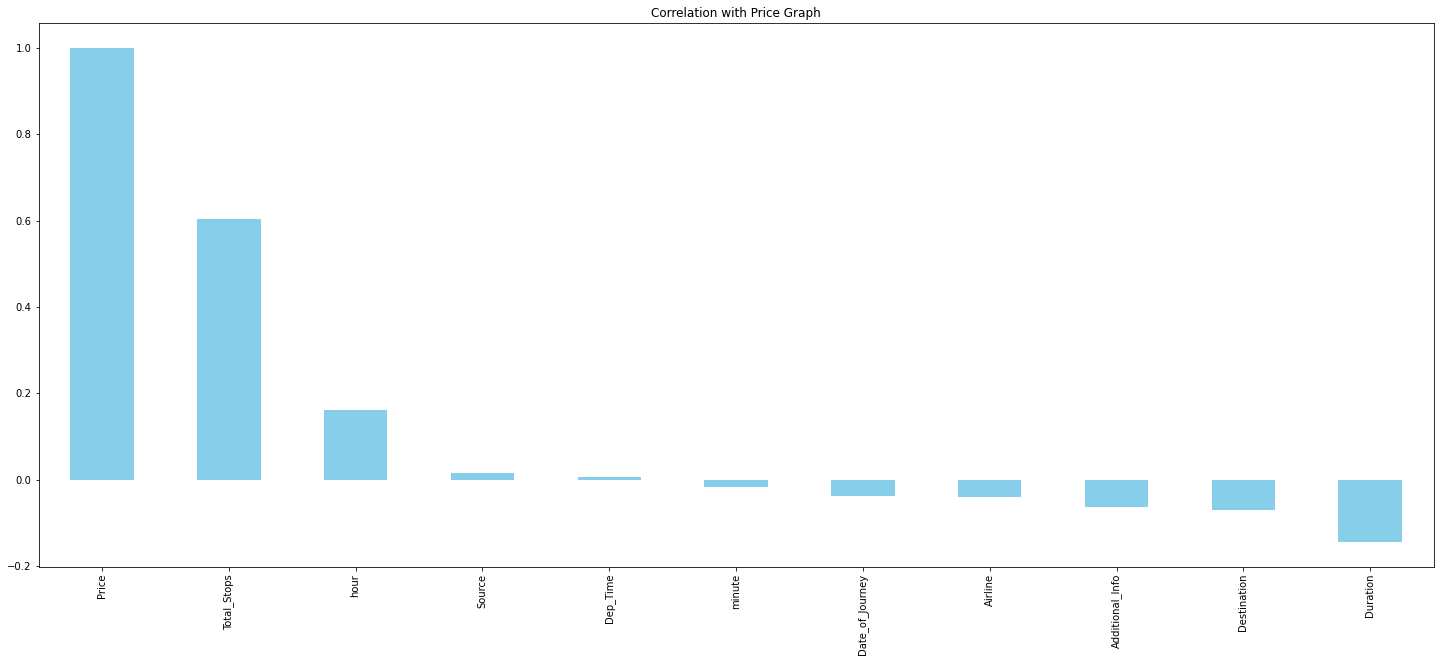

In [57]:
# Using correlation matrix
plt.figure(figsize =(25, 10))
df.corr()['Price'].sort_values(ascending = False).plot(kind ='bar', color ='skyblue')
plt.title('Correlation with Price Graph')
plt.show()

As per the above graph Price and Total_Stops highly corelated with price.

# Removing Skewness and Outliers

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([  123,   396,   402,   486,   510,   597,   628,   657,   785,
         785,   826,   919,   936,   946,   959,   975,  1043,  1196,
        1218,  1246,  1341,  1424,  1466,  1478,  1629,  1654,  1665,
        1712,  1785,  1918,  2055,  2079,  2099,  2108,  2172,  2405,
        2481,  2495,  2495,  2556,  2556,  2618,  2623,  2633,  2635,
        2693,  2718,  2814,  2822,  2883,  2924,  2924,  3032,  3032,
        3111,  3111,  3157,  3220,  3257,  3317,  3400,  3496,  3535,
        3535,  3568,  3584,  3700,  3700,  3788,  3815,  3945,  4012,
        4118,  4463,  4521,  4521,  4655,  4676,  4760,  4829,  5013,
        5013,  5050,  5136,  5372,  5372,  5439,  5446,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5838,  5856,  5947,  5986,
        5996,  6024,  6314,  6336,  6407,  6444,  6576,  6576,  6588,
        6599,  6605,  6884,  6991,  7001,  7031,  7249,  7351,  7356,
        7377,  7537,  7554,  7586,  7617,  7713,  7724,  7724,  7752,
        7756,  7876

In [59]:
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]
print(df.shape)
print(new_df.shape)

(10683, 11)
(10527, 11)


In [60]:
#checking for how much data we lost
loss_percent=(10683-10475)/10683*100
print(loss_percent)

1.9470186277262942


We lost 1.94% of data, It will not affect our data that much.

In [61]:
new_df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,hour,minute
0,3,24,0,5,1340,240,0,7,3897,11,9
1,1,6,3,0,350,336,2,7,7662,41,3
2,4,43,2,1,565,106,2,7,13882,10,11
3,3,10,3,0,1085,311,1,7,6218,38,3
4,3,0,0,5,1010,303,1,7,13302,33,7
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,1195,236,0,7,4107,11,4
10679,1,29,3,0,1245,237,0,7,4145,11,5
10680,4,29,0,2,500,280,0,7,7229,22,11
10681,10,0,0,5,690,238,0,7,12648,11,6


In [62]:
#Removing skewness
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in new_df.columns:
    if abs(new_df.loc[:,i].skew())>0.55:
        new_df.loc[:,i]=PT.fit_transform(new_df.loc[:,i].values.reshape(-1,1))

In [63]:
#Checking skewness of all columns
new_df.skew()

Airline           -0.014100
Date_of_Journey   -0.061557
Source            -0.439471
Destination        0.040643
Dep_Time           0.120413
Duration          -0.215098
Total_Stops        0.227994
Additional_Info   -1.137092
Price              0.415110
hour              -0.082273
minute             0.079588
dtype: float64

# Scaling Data using StandardScaler

In [64]:
y = new_df["Price"]
x = new_df.drop(["Price"], axis=1)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler() #Initializting MinMaxScaler
new = scale.fit(x)  #fitting our data into MinMaxScaller
scale_x = new.transform(x) #Transforming the data

#Setting up the coulumns after Scaling
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x

x.head() #Priting top 5 rows of our data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,hour,minute
0,0.420215,0.558140,0.00,1.000000,0.932862,0.653951,0.0,0.164716,0.514266,0.818182
1,0.177522,0.139535,0.75,0.000000,0.233216,0.915531,1.0,0.164716,0.978867,0.272727
2,0.515933,1.000000,0.50,0.440802,0.385159,0.288828,1.0,0.164716,0.488447,1.000000
3,0.420215,0.232558,0.75,0.000000,0.752650,0.847411,0.5,0.164716,0.945850,0.272727
4,0.420215,0.000000,0.00,1.000000,0.699647,0.825613,0.5,0.164716,0.886769,0.636364


# Splitting the data for training and testing

In [67]:
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.5440949565615405  on Random_state  812


In [76]:
from sklearn.tree import DecisionTreeRegressor

maxaccu =0
maxrs = 0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
    mod = DecisionTreeRegressor()
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print("Best accuracy is ",maxaccu,"on random state ",maxrs)

Best accuracy is  0.8393178471726497 on random state  41


For splitting the data for training and testing using LinearRegression and DecisionTreeRegressor the best accuracy is given by DecisionTreeRegressor i.e 83.93%  at random state 41.

# Modal Building

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxrs)

In [73]:
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [74]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [77]:
for m in model:
    print("*******************************************************************************")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("*******************************************************************************")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.5298808556918585
Mean Absolute Error:      2192.9389847418993
Mean Squared error:       7849684.42733728
Root Mean Squared Error:  2801.7288283017824
[0.5154124  0.49485948 0.54422286 0.50846979 0.5002515  0.51138641
 0.48533872 0.53024315]
cross validation score:   0.5112730399183676
Difference between R2 score and cross validatio score is -  0.01860781577349091
*******************************************************************************
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.890691621520072
Mean Absolute Error:      810.6609924959265
Mean Squared error:       1825146.4266449376
Root Mean Squared Error:  1350.9798024563274
[0.88407505 0.89212082 0.89620552 0.89032221 0.88854487 0.88582805
 0.88748379 0.87673239]
cross valida

We conclude the best model building method is RandomForestRegressor model have heighest accuracy i.e. 89.06% with 88.76% cross validation score which is good and the difference is too less.

# Hyper Parameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":range(21,25),
              "criterion":['mse'],
              "max_features": ['auto', 'sqrt'],
              "min_samples_leaf":range(1,5)}

clf = GridSearchCV(RandomForestRegressor(), parameters)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'criterion': 'mse',
 'max_depth': 22,
 'max_features': 'auto',
 'min_samples_leaf': 1}

In [79]:
clf_pred=clf.best_estimator_.predict(x_test)

r2_score(y_test, clf_pred)

0.891333346962818

After Hyper Tuning Parameter Our model gives 89.13% accurate.

# Saving model

In [80]:
import joblib
joblib.dump(clf.best_estimator_,"Flight_Price_Pred.obj")
RF_from_joblib=joblib.load('Flight_Price_Pred.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([10332.81      ,  4838.60633333,  3710.52      , ...,
        3496.76      , 13907.20333333,  8999.74148033])

# Anaylise Actual and Predicted values

In [81]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

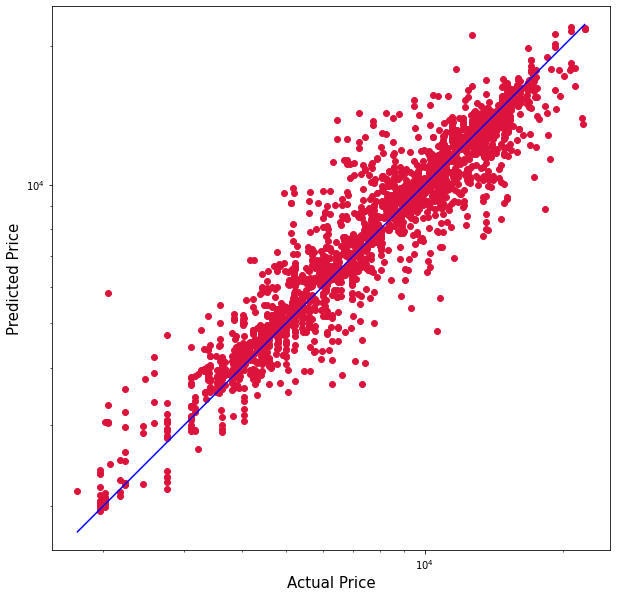

In [82]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predicted), max(y_test))
p2 = min(min(Predicted), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')
plt.show()

After anaylise the actual and predicted price we conclude that their is no such difference between both.

# We Conclude that for our Dataset Best Model is RandomForestRegressor gives the higest accuracy i.e 89.06%.